In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import os

In [6]:
path = r"R:\Asset_Management\Models\Equity\EMEF\EMEF_Factory\exports\20241120"
filename = "2024_11_20_developed_markets_historical.xlsx"

In [7]:
weights_fund = pd.read_excel(path + "/" + filename, sheet_name="weights_matrix_fund", index_col=0)
weights_bm = pd.read_excel(path + "/" + filename, sheet_name="weights_matrix_bm", index_col=0)

In [55]:
# define functions
import numpy as np

def herfindahl_hirschman_index(market_shares):
    """
    Calculate the Herfindahl-Hirschman Index (HHI).
    Args:
        market_shares (list or np.array): Market shares of the constituents.
    Returns:
        float: The HHI value.
    """
    return np.sum(np.square(market_shares))

def concentration_ratio(market_shares, n):
    """
    Calculate the Concentration Ratio (CR) for the top n constituents.
    Args:
        market_shares (list or np.array): Market shares of the constituents.
        n (int): The number of top constituents to consider.
    Returns:
        float: The concentration ratio for the top n constituents.
    """
    sorted_shares = sorted(market_shares, reverse=True)
    return np.sum(sorted_shares[:n])

def shannon_entropy(market_shares):
    """
    Calculate Shannon Entropy.
    Args:
        market_shares (list or np.array): Market shares of the constituents.
    Returns:
        float: Shannon Entropy.
    """
    market_shares = np.array(market_shares)
    non_zero_shares = market_shares[market_shares > 0]  # Avoid log(0) errors
    return -np.sum(non_zero_shares * np.log(non_zero_shares))

def effective_number_of_constituents(market_shares):
    """
    Calculate the Effective Number of Constituents (ENC).
    Args:
        market_shares (list or np.array): Market shares of the constituents.
    Returns:
        float: The ENC value.
    """
    return 1 / np.sum(np.square(market_shares))


def calculate_all_numbers(market_shares):
    return {
        'hhi' : herfindahl_hirschman_index(market_shares),
        'cr3' : concentration_ratio(market_shares, 10),
        'entropy' : shannon_entropy(market_shares),
        'enc' : effective_number_of_constituents(market_shares),
    }


In [56]:
results_fund = {}
results_bm = {}
results_ew = {}

for reb_date in weights_bm.index:
    w_bm = weights_bm.loc[reb_date].dropna()
    w_bm = w_bm[w_bm>0]
    results_bm[reb_date] = calculate_all_numbers(w_bm)

    w_fund = weights_fund.loc[reb_date].dropna()
    w_fund = w_fund[w_fund>0]
    results_fund[reb_date] = calculate_all_numbers(w_fund)

    w_ew = np.repeat(1/w_fund.shape[0], w_fund.shape[0])
    results_ew[reb_date] = calculate_all_numbers(w_ew)

results_fund = pd.DataFrame(results_fund).T 
results_fund['model'] = "Fund"

results_bm = pd.DataFrame(results_bm).T 
results_bm['model'] = "Benchmark"

results_ew = pd.DataFrame(results_ew).T 
results_ew['model'] = "Equal Weighted"

results_ew.index = pd.to_datetime(results_ew.index, format="%Y-%m-%d")
results_bm.index = pd.to_datetime(results_bm.index, format="%Y-%m-%d")
results_fund.index = pd.to_datetime(results_fund.index, format="%Y-%m-%d")

In [57]:
results_all = pd.concat([results_bm, results_fund, results_ew])
results_all.index = pd.to_datetime(results_all.index, format="%Y-%m-%d")

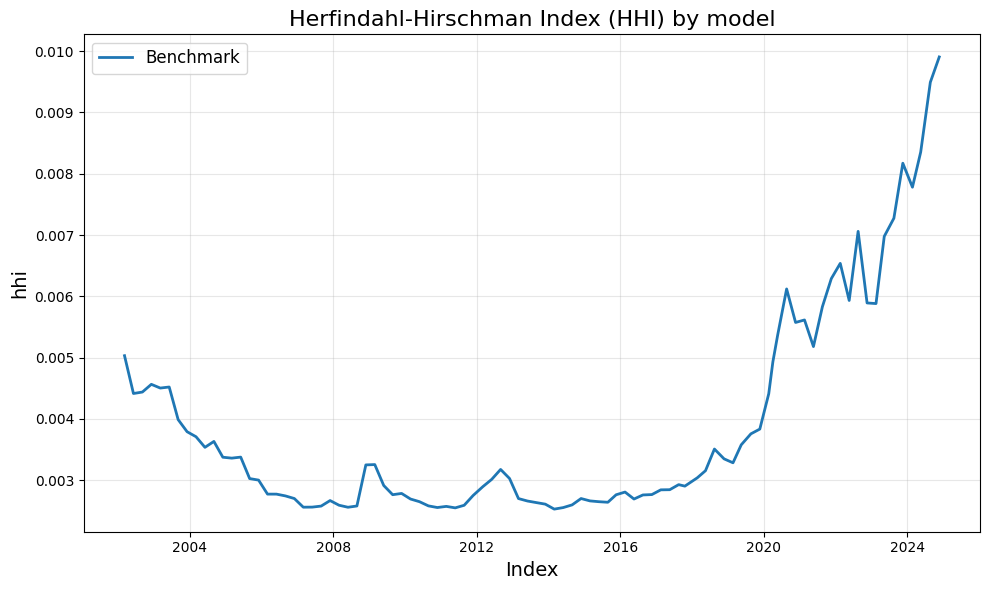

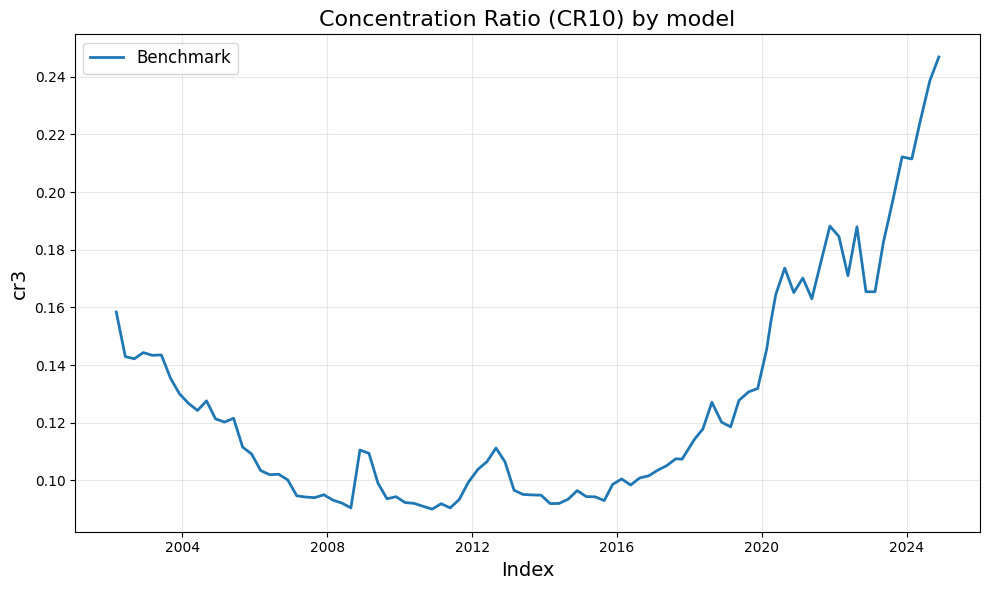

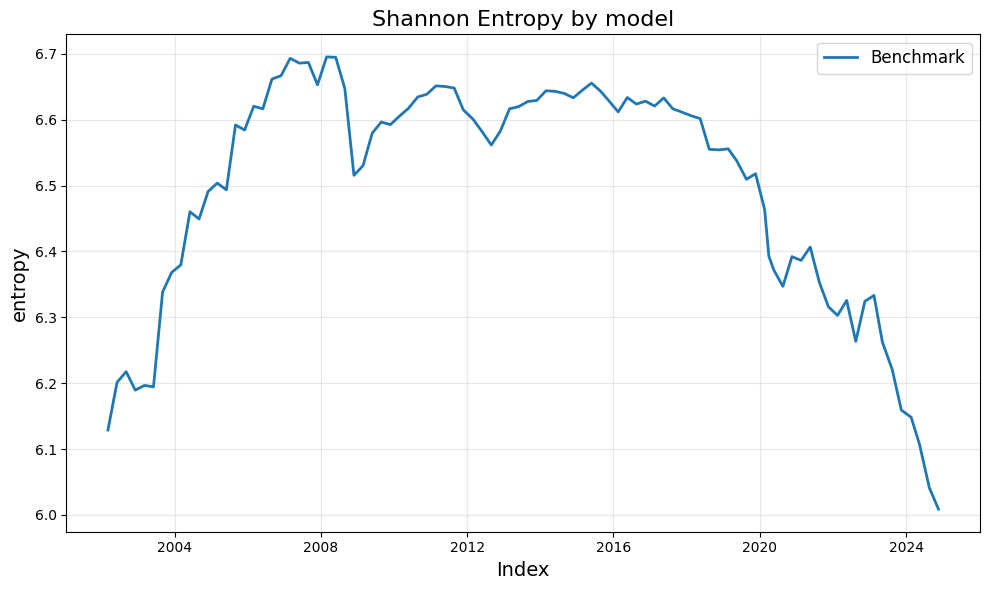

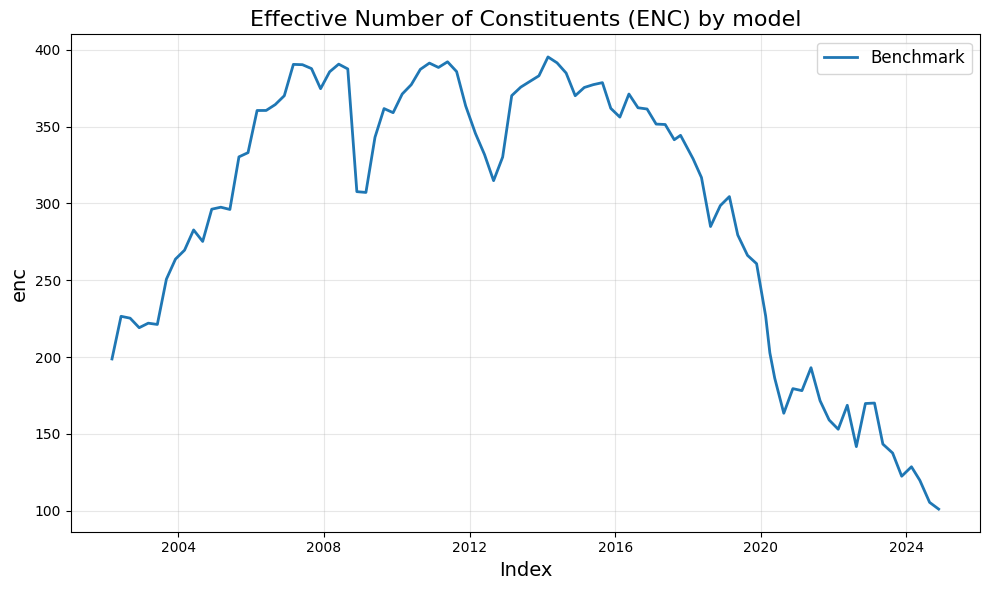

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def plot_long_format(df, group_col, y_cols, titles):
    """
    Plots line plots for each variable in `y_cols` from a long-format DataFrame.
    
    Parameters:
    - df: pd.DataFrame
        The input DataFrame in long format with the x-axis column as the index.
    - group_col: str
        The column representing different groups (categories).
    - y_cols: list of str
        List of columns to plot as separate figures for the y-axis.
    """
    # Ensure input columns are valid
    if group_col not in df.columns:
        raise ValueError(f"Column '{group_col}' not found in DataFrame.")
    for y_col in y_cols:
        if y_col not in df.columns:
            raise ValueError(f"Column '{y_col}' not found in DataFrame.")
    
    # Iterate through each y-axis column and create a plot
    for title, y_col in zip(titles, y_cols):
        plt.figure(figsize=(10, 6))
        for group, group_data in df.groupby(group_col):
            plt.plot(group_data.index, group_data[y_col], label=group, linewidth=2)


        plt.title(f'{title} by {group_col}', fontsize=16)
        plt.xlabel('Index', fontsize=14)
        plt.ylabel(y_col, fontsize=14)
        plt.legend(title="", fontsize=12)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()


plot_long_format(results_bm, 'model', results_bm.columns[0:4], 
                 titles =  ["Herfindahl-Hirschman Index (HHI)", "Concentration Ratio (CR10)", "Shannon Entropy", "Effective Number of Constituents (ENC)"])

In [42]:
pd.to_datetime(results_all.index, format="%Y-%m-%d")

DatetimeIndex(['2002-03-06', '2002-06-05', '2002-09-04', '2002-12-04',
               '2003-03-05', '2003-06-04', '2003-09-03', '2003-12-03',
               '2004-03-03', '2004-06-02',
               ...
               '2022-08-17', '2022-11-16', '2023-02-15', '2023-05-10',
               '2023-08-16', '2023-11-15', '2024-02-21', '2024-05-15',
               '2024-08-21', '2024-11-20'],
              dtype='datetime64[ns]', length=279, freq=None)

In [43]:
results_all.columns[0:4]

Index(['hhi', 'cr3', 'entropy', 'enc'], dtype='object')

In [44]:
results_all

,hhi,cr3,entropy,enc,model
2002-03-06,0.005032,0.158395,6.128918,198.727940,Benchmark
2002-06-05,0.004415,0.142942,6.201282,226.497288,Benchmark
2002-09-04,0.004439,0.142183,6.217507,225.280121,Benchmark
2002-12-04,0.004565,0.144330,6.189386,219.073346,Benchmark
2003-03-05,0.004504,0.143383,6.196606,222.025312,Benchmark
...,...,...,...,...,...
2023-11-15,0.006369,0.063694,5.056246,157.000000,Equal Weighted
2024-02-21,0.006536,0.065359,5.030438,153.000000,Equal Weighted
2024-05-15,0.006410,0.064103,5.049856,156.000000,Equal Weighted
2024-08-21,0.006494,0.064935,5.036953,154.000000,Equal Weighted


In [45]:
(weights_bm>0).sum(axis=1)

date
2002-03-06    1515
2002-06-05    1509
2002-09-04    1509
2002-12-04    1495
2003-03-05    1471
              ... 
2023-11-15    1483
2024-02-21    1466
2024-05-15    1429
2024-08-21    1410
2024-11-20    1409
Length: 93, dtype: int64

In [46]:
(weights_fund>0).sum(axis=1)

date
2002-03-06    146
2002-06-05    147
2002-09-04    146
2002-12-04    145
2003-03-05    147
             ... 
2023-11-15    157
2024-02-21    153
2024-05-15    156
2024-08-21    154
2024-11-20    159
Length: 93, dtype: int64